<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/Dataset5050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#untuk menghubungkan drive ke colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Library python yang dipakai

import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra
import math
import os #library lokasi path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2

In [5]:
terinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi/')
print(terinfeksi_data)

print('\n')

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi/')
print(tidakTerinfeksi_data)

['C38P3thinF_original_IMG_20150621_112043_cell_203.png', 'C38P3thinF_original_IMG_20150621_112116_cell_204.png', 'C38P3thinF_original_IMG_20150621_112116_cell_205.png', 'C38P3thinF_original_IMG_20150621_112138_cell_183.png', 'C38P3thinF_original_IMG_20150621_112246_cell_236.png', 'C39P4thinF_original_IMG_20150622_105102_cell_82.png', 'C39P4thinF_original_IMG_20150622_105102_cell_81.png', 'C39P4thinF_original_IMG_20150622_105102_cell_79.png', 'C39P4thinF_original_IMG_20150622_105102_cell_83.png', 'C39P4thinF_original_IMG_20150622_105102_cell_80.png', 'C39P4thinF_original_IMG_20150622_105102_cell_86.png', 'C39P4thinF_original_IMG_20150622_105102_cell_96.png', 'C39P4thinF_original_IMG_20150622_105102_cell_88.png', 'C39P4thinF_original_IMG_20150622_105102_cell_87.png', 'C39P4thinF_original_IMG_20150622_105102_cell_99.png', 'C39P4thinF_original_IMG_20150622_105102_cell_95.png', 'C39P4thinF_original_IMG_20150622_105102_cell_93.png', 'C39P4thinF_original_IMG_20150622_105102_cell_91.png', 'C39

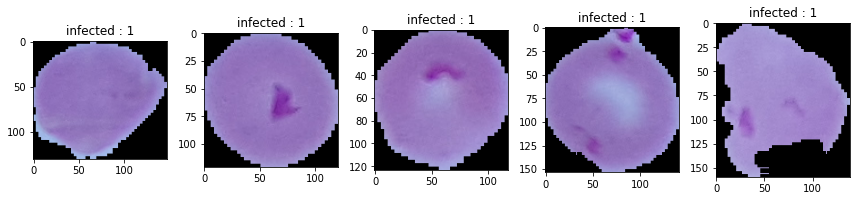

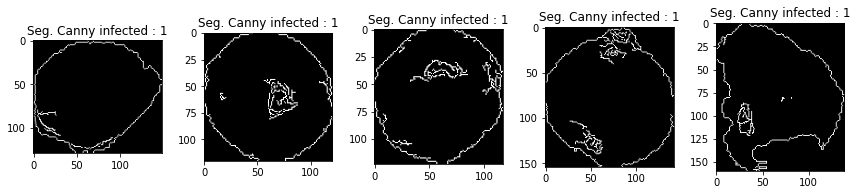

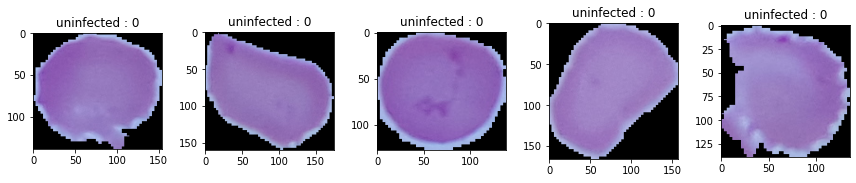

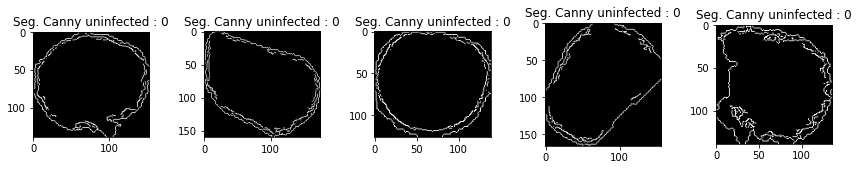

In [22]:
#Tahap Visualisasi Citra Malaria Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()


#Tahap Visualisasi Citra Malaria Tidak Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

In [0]:
#SEGMENTASI CANNY DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Target']])

#Proses Citra Malaria Terinfeksi
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Malaria TidakTerinfeksi
for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DatasetMalaria5050.csv", x, fmt='%s',delimiter=',' )

In [30]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DatasetMalaria5050.csv')
print (len(dataset))
print (dataset)

1000
           H1        H2            H3  ...            H6            H7  Target
0    0.026648  0.000027  1.191604e-07  ...  5.928042e-09  3.781406e-13     1.0
1    0.014957  0.000005  2.160386e-08  ...  2.528009e-10  5.082177e-15     1.0
2    0.014479  0.000006  1.128404e-07  ...  4.062571e-10 -1.510320e-14     1.0
3    0.019210  0.000056  6.675118e-08  ...  8.208133e-10 -1.293234e-14     1.0
4    0.020044  0.000003  9.027330e-07  ...  7.334498e-10 -5.774392e-14     1.0
..        ...       ...           ...  ...           ...           ...     ...
995  0.023025  0.000034  1.234066e-06  ...  1.254879e-09 -9.584874e-14     0.0
996  0.017575  0.000003  1.555579e-09  ... -3.142333e-11 -3.365267e-17     0.0
997  0.016321  0.000024  1.071161e-07  ...  3.645080e-11 -9.062446e-17     0.0
998  0.019665  0.000011  2.716059e-08  ...  2.790508e-10  2.192619e-15     0.0
999  0.020192  0.000006  7.381005e-08  ...  6.818228e-10 -3.428541e-14     0.0

[1000 rows x 8 columns]
